Замятина Екатерина
476 группа

# Получите  численное  решение   нелинейной  краевой задачи:

$$ \hspace{5mm} y^" + p*x*\cos(y) = 0, \hspace{1cm} 0<x\leq 1$$
$$ y(0)=0; \hspace{5mm} y(1)=0, p=1,4,7,25,50,100 $$

## Теоретическая часть

Перемишем задачу в виде: $$ y" = -p*x\cos(y) = [x=1-x] = -p(1-x)\cos(y) =  f(x,y)$$
$$ y(1)=0; \hspace{5mm} y(0)=0, p=1,4,7,25,50,100 $$

### Метод стрельбы

Будем сводить решение краевой задачи к задачи Коши вида:

$ y" = f(x,y) \hspace{1cm} 0<x\leq 1$

$y(0) = 0;\hspace{15mm} y'(0)=\alpha$

$y(x,\alpha)|_{x=1}=y(1,\alpha)= F(\alpha) = 0$


Как видно из строчки выше, для этого нам надо решить уравнение $F(\alpha)=0$.

Будем решать методом Ньютона.

Задаем $\alpha_0 = 0$

$\alpha_{n+1} = \alpha_n - \dfrac{F(\alpha_n)}{F'(\alpha_n)} = \alpha_n - \dfrac{y'(1,\alpha_n)}{y''(1,\alpha_n)}$

Для нахождения y', y будем решать Задачу Коши выписанную выше (но все равно ее продублируем):

$$\begin{equation*}
 \begin{cases}
   y"(x,\alpha) = f(x,y)& x\in[0,1]\\
   y(0,\alpha) = 0 & y'(0,\alpha) = \alpha
 \end{cases}
\end{equation*}  \hspace{5mm}(1)
$$

Продифференцируем уравнение по $\alpha$:

$$ \frac{\partial y^"(x,\alpha)}{\partial \alpha} = \dfrac{\partial f}{\partial x} \dfrac{\partial x}{\partial \alpha} + \dfrac{\partial f}{\partial y} \dfrac{\partial y}{\partial \alpha}$$

Причем $\dfrac{\partial x}{\partial \alpha} = 0$, так как x не зависит от $\alpha$.

Введем новую переменную:    $z(\alpha, x) = \dfrac{\partial y}{\partial \alpha}$
   Тогда начальные условия перепишутся в виде: $z(0,\alpha) = 0 \hspace{5mm} z'(0, \alpha) = 1$  Получим:

$$\begin{equation*}
 \begin{cases}
  z^"(x, \alpha) = \dfrac{\partial f}{\partial y} z(x,\alpha)  & x\in[0,1]\\
   z(0,\alpha) = 0 & z'(0,\alpha) = 1 &
 \end{cases}
\end{equation*} \hspace{5mm} (2)
$$


$$\alpha_{n+1} = \alpha_n - \dfrac{y(1,\alpha_n)}{z(1,\alpha_n)} \hspace {1cm} \alpha_0 = 0$$

### Решение задачи Коши

Перепишем задачу Коши (2) (1) для нашего уравнения:

\begin{equation}
 \begin{cases}
  z^"(x, \alpha) = p(1-x) \sin(y)*z(x,\alpha) & x\in[0,1]\\
   z(1,\alpha) = 0 & z'(0,\alpha) = 1 \\
   \\
   y^"(x,\alpha) = -p(1-x) \cos(y)& x\in[0,1]\\
   y(1,\alpha) = 0 & y'(1,\alpha) = \alpha
 \end{cases}
\end{equation} 


Сведем получившиеся системы к системе первого порядка:


\begin{equation}
 \begin{cases}
  v'(x, \alpha) = p(1 - x) \sin(y)*z(x,\alpha) & x\in[0,1]\\
   v(1,\alpha) = 1 \\
   \\
   z'_x(x, \alpha) = v(x, \alpha) \\
   z(1,\alpha) = 0 \\
   \\
   u_x'(x,\alpha) = -p(1 - x) \cos(y)& x\in[0,1]\\
   u(1,\alpha) = \alpha \\
   \\
   y'_x(x, \alpha)=u(x, \alpha) \\
   y(1,\alpha) = 0 \\
 \end{cases}
\end{equation}

Систему  можно решить явным Методом Ругне Кутта второго порядка:
\begin{equation}
 \begin{cases}
  w(x)' = f(w,x)& x\in (0,1]\\
  w(0) = w_0\\
 \end{cases}
\end{equation}


$$w_{n+1} = w_n +h(b_1r_1 + b_2r_2) = w_n + hr_2$$


$$r1=f(w_n,x_n)$$

$$r2=f(w_n + \frac{h}{2},w_n+ \frac{h}{2}r_1)$$

$$w = (v,z,u,y)^T \hspace{1cm} w_0 =(1,0,\alpha, 0)^T$$

## Практическая часть

### Решение Задачи Коши

In [5]:
import numpy as np

In [10]:
def f(x, w, p):
    v = w[0]
    z = w[1]
    u = w[2]
    y = w[3]
    f = np.ndarray(4)
    
    f[0] = p*(1-x)*np.sin(y)*z
    f[1] = v
    f[2] = -p*(1-x)*np.cos(y)
    f[3] = u
    return f

In [11]:
def Runge_Kutta_method(w0,n, p, marker_end_of_Newton_method = "no"):
    x0 = 0
    h = 1./n
    y = []
    for i in range(n):
        r1=f(x0,w0, p)
        w = w0 + h*f(x0 + 0.5*h, w0 + 0.5*h*r1, p)
        w0 = w
        x0 = x0 + h 
        if (marker_end_of_Newton_method == "end"):
            y.append(w0[3])
    return w[1], w[3], y

### Решение методом Ньютона

$\alpha_{n+1} = \alpha_n - \dfrac{y(1,\alpha_n)}{z(1,\alpha_n)} \hspace {5mm} \alpha_0 = 0 \hspace {5mm}$,    где y z находим из Newton_method

In [12]:
def Newton_method(eps, p):
    a0 = 0
    n = 10000
    a = 1000
    y = 1
    z =1
    while ((y/z)*(y/z) > eps*eps):
        w0 = np.array([1,0,a0,0])
        z,y, mass_y = Runge_Kutta_method(w0,n, p)
        a = a0 - y/z
        a0 = a
    z,y, mass_y = Runge_Kutta_method(w0,n, p, "end")
    return y, mass_y, a

In [13]:
y=[]
a=[]
mass_y=[]
p=[1,4,7]
for i in range(3):
    d, b, c,  = Newton_method(0.0001, p[i])
    y.append(d)
    mass_y.append(b)
    a.append(c)

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# График y(x) - решение уравнения

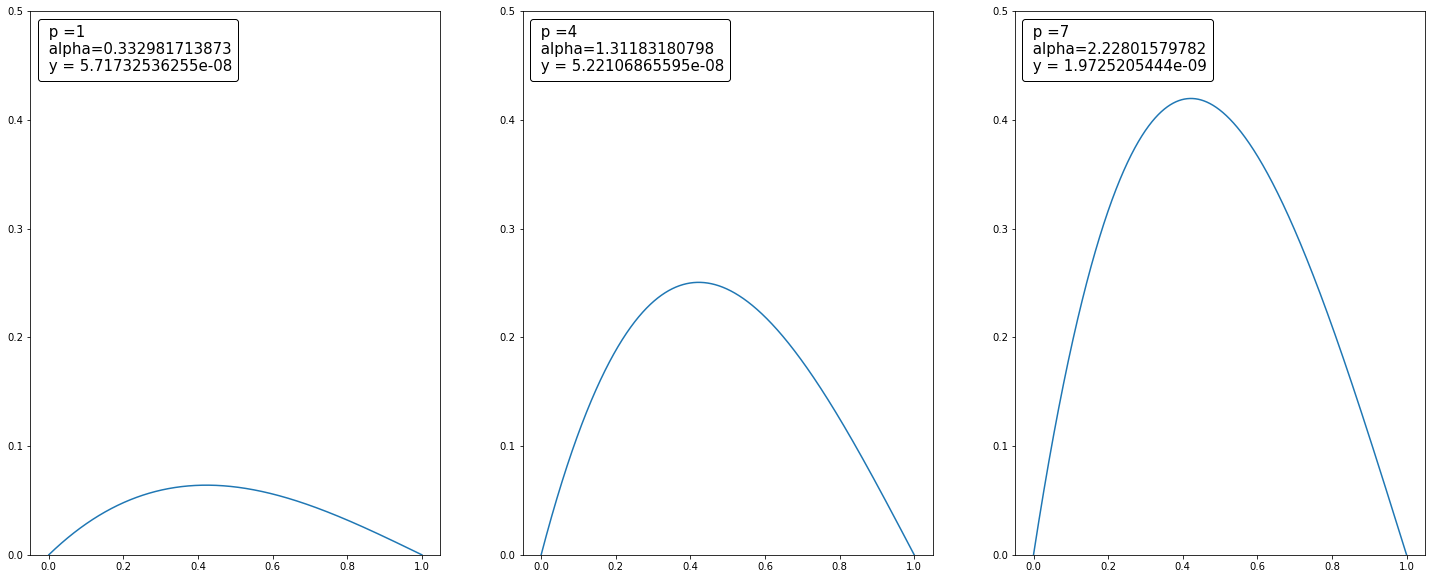

In [16]:
plt.figure(figsize=(25, 10))
for j in range(len(p)):
    ax = plt.subplot(1, len(p), j + 1)
    plt.plot(np.linspace(0,1,len(mass_y[j])), mass_y[j])
    from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
    at = AnchoredText(r' p ={}{} alpha={}{} y = {}'.format(p[j],'\n', a[j],'\n', y[j]),
                  prop=dict(size=15), frameon=True,
                  loc=2,
                  )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    ax.set_ylim([0,0.5])
    plt.legend()
plt.show()

# Неусточивость метода прогонки

Метод стрельбы, сводящий решение краевой задачи (1) к вычислению решений задачи Коши (2), хорошо работает в том случае если p достаточно мал. 
Неустойчивость можно увидеть если запустить NewtonMethod c p $\ge 20$
Чтобы понять природу неустойчивости жавайте ленеризуем задачу:
$y(x) = y_0(x) + v(x)$ , где v(x) - поправка к нулевому приближению $y_0$

$y''(x) = y_0''(x) + v''(x)$

$f(x, y_0 + v) = f(x,y_0) + \dfrac{\partial f(x,y_0)}{\partial y}v  + O(|v^2|)$

$r(x) = f(y_0,x) - y''_0(x)$

Применим выкладки выше для нашей системы:

$v''(x) \approx p(1-x)\sin(y_0)*v \approx q^2(p)*v \hspace{50mm} (3)$

$v(0)=0 \hspace{20mm} v(1) = \alpha$



Решение: $v = \dfrac{\alpha}{e^q + e^{-q}}e^{q(p)x} - \dfrac{\alpha}{e^q + e^{-q}} e^{-q(p)x}$

Видно, что при больших параметрах q(p) задача становится жесткой и не устойчивой, получается, что при малых погрешностях в вычислениях $\alpha$ решение задачи сильно меняется.


Еще один пример (не относящийся к исходной задаче)

$ y" - a^2y = 0 \hspace{17mm} x \in [0,1]$

$ y(0) = Y_0 \hspace{20mm} y(1) = Y_1 $

Решение данной системы : $y(x) = \dfrac{e^{-ax} - e^{-a(2-x)}}{1 - e^{-2a}}Y_0 + \dfrac{e^{-a(1-x)} - e^{-a(1+x)}}{1 -e^{-2a}}Y_1$

Коэффициенты при с ростом а остаются ограниченными на отрезке функциями; при всех они не превосходят единицу. Поэтому небольшие ошибки при задании ведут к столь же небольшим погрешностям в решении. Рассмотрим теперь задачу Коши:

$ y" - a^2y = 0 \hspace{17mm} x \in [0,1]$

$ y(0) = Y_0 \hspace{20mm} y(1) = tg(\alpha) $

Решение данной системы : $y(x) = \dfrac{e^{-\alpha x} - e^{-\alpha (2-x)}}{1 - e^{-2\alpha}} e^{\alpha x} + \dfrac{e^{-\alpha (1-x)} - e^{-\alpha (1+x)}}{1 -e^{-2\alpha}}e^{- \alpha x} $

Если при задании $\alpha$ допущена погрешность $\varepsilon$, то значение решения при x=1 получит приращение :
$\delta y = \dfrac{\varepsilon}{2\alpha}e^{\alpha} - \dfrac{\varepsilon}{2\alpha}e^{-\alpha}$

При больших $\alpha$ вычитаемое в равенстве выше пренебрежимо мало, но коэффициент при в первом $e^{\alpha}$ слагаемом становится большим. Поэтому метод стрельбы при решении задачи будучи формально приемлемой процедурой, при больших $\alpha$ становится практически непригодным. 

# Метод Ньютона (Метод линеризации)

Воспользуемся методом линеризации описанном выше , а именно формулой (3)

Пусть $y_0(x) = (x-1)*x$

$y(x) = y_0(x) + v(x)$

$v(0)=0 \hspace{15mm} v(1) = 0$

$r(x) = -p(1-x)\cos(y_0) - \nabla^2 y_0$


$
$$\begin{equation*}
 \begin{cases}
 v''(x) = p(1-x)\sin(y_0)*v(x)  +r(x) \\
 v(0)=0 \hspace{10mm} v(1) = 0 \hspace{10mm} x\in[0,1] 
 \end{cases}
\end{equation*} 
$$
$

Будем решать данную линейную систему методом дифференциальной прогонки и обычной прогонкой.

### Диффернциальный метод прогонки

$
$$\begin{equation*}
 \begin{cases}
 v'(x) = w(x) & v(0)=0 & v(1) = 0 \\
 w'(x) = p(1-x)\sin(y_0)*v  +r(x)  & x\in[0,1] &
 \end{cases}
\end{equation*} 
$$
$

Будем искать решение в виде $v(x) = \alpha(x)w(x) + \beta(x)$, где $\alpha$ и $\beta$ - прогоночные коэффиценты.
$v'(x) = \alpha'(x) w(x) + \alpha w'(x) + \beta'(x) = \alpha'(x) w(x) + \alpha(x) (p(1-x)\sin(y_0)*v(x) + r(x)) + \beta'(x) = \alpha'(x) w(x) + \alpha(x) (p(1-x)\sin(y_0)*(\alpha(x)w(x) + \beta(x)) + r(x)) + \beta'(x) =  w(x) $

$w(x)(-1 + \alpha'(x) + \alpha^2(x)p(1-x)\sin(y_0)) + \alpha(p(1-x)\sin(y_0) * \beta(x) + r(x)) + \beta'(x) = 0$

Приравнивания к нулю стемени w(x) , получим два диффернциальных уравнения для прогоночных коэффицентов:

$
$$\begin{equation*}
 \begin{cases}
 -1 + \alpha'(x) + \alpha^2(x)p(1-x)\sin(y_0) = 0 \\
\alpha(p(1-x)\sin(y_0) * \beta(x) + r(x)) + \beta'(x) = 0 \\
 \end{cases}
\end{equation*} 
$$
$

$
$$\begin{equation*}
 \begin{cases}
\alpha'(x) = 1 - \alpha^2(x)p(1-x)\sin(y_0) \\
\beta'(x) = -\alpha(p(1-x)\sin(y_0) * \beta(x) + r(x)) \\
\alpha(0) = 0 \\
\beta(0) = 0
 \end{cases}
\end{equation*} 
$$
$

Левое граничное условие :$v(0) = \alpha(0) w(0) + \beta(0) = 0$ - пусть $\alpha(0) = 0 \hspace{5mm} \beta(0)=0$

Получим разностную задачу для w(x):

Правое граничное условие: $v(1) = w(1)\alpha(1) + \beta(1) = 0$ ,тогда $w(1) = -\frac{\beta(1)}{\alpha(1)}$

$w'(x) = p(1-x)\sin((y_0)*v  +r(x) = p(1-x)\sin(y_0)*(\alpha(x)w(x) + \beta(x)) +  r(x)$



Эти задачи Коши могут быть решены методом Рунге-Кутты второго порядка.

# Практическая часть

$r(x) = -p(1-x)\cos(y_0) - \nabla^2 y_0$

In [102]:
def r(x,p,ddy,y0):
    #print (-p*(1.-x)*np.cos(y0), - ddy)
    return-p*(1.-x)*np.cos(y0) - ddy

$
$$\begin{equation*}
 \begin{cases}
\alpha'(x) = 1 - \alpha^2(x)p(1-x)\sin(y_0) \\
\beta'(x) = -\alpha(p(1-x)\sin(y_0) * \beta(x) + r(x)) 
 \end{cases}
\end{equation*} 
$$
$

In [53]:
def f(x, w, p, ddy, y0):
    a = w[0]
    b = w[1]
    f = np.ndarray(2)
    
    f[0] = 1 - a*a*p*(1-x)*np.sin(y0)
    #print f[0]
    f[1] = -a*(p * (1-x) * np.sin(y0) * b + r(x,p,ddy,y0))
    return f

### Метод дифференциальной прогонки

$w'(x) = p(1-x)\sin(y_0(x))*(\alpha(x)w(x) + \beta(x)) +  r(x)$

$w'(1 - x) = p(x)\sin(y_0(1-x))*(\alpha(1-x)w(1-x) + \beta(1-x)) +  r(1-x)$

In [45]:
def g(x, w, p, a , b, y0,ddy):
    return p * x * np.sin(y0) * (a * w + b) + r(1 - x,p,ddy,y0)

$y_0(x) = x*(1-x)$

In [181]:
def fy0(n):
    x = np.linspace(0, 1, n)
    y0 =  np.array([p*x[i]*(1. - x[i]) for i in range(0, n)])
    return y0

In [131]:
def dd_y0(n,y0):
    return np.array(list(np.diff(y0,n=2)) + list(np.diff(y0,n=2)[:2]))*n*n
    #return np.ones(n)

$w'(x)  = p(1-x)\sin(y_0)*(\alpha(x)w(x) + \beta(x)) \Rightarrow$

$w'(x)= p*x\sin(y_0)*(\alpha(1-x)w(x) + \beta(1-x))$

$w(0) = - \frac{\alpha}{\beta}$

In [132]:
def Runge_Kutta_method_2(w0, n, p, a, b, y0,ddy):
    x0 = 0
    h = 1./n
    w = []
    for i in range(1,n+1):
        w.append(w0)
        r1=g(x0, w0, p, a[-i], b[-i], y0[-i], ddy[-i])
        w0 = w0 + h * g(x0 + 0.5*h, w0 + 0.5*h*r1, p, a[-i], b[-i], y0[-i], ddy[-i])
        #print h * g(x0 + 0.5*h, w0 + 0.5*h*r1, p, a[-i], b[-i], y0[-i], ddy[-i])
        x0 = x0 + h 
    w = np.array(w)[::-1]*a+b    
    #print w
    return w

In [133]:
def Runge_Kutta_method(w0, n, p, y0,ddy):
    x0 = 0
    h = 1./n
    a = []
    b = [] 
    for i in range(n):
        r1=f(x0, w0, p, ddy[i], y0[i])
        w0 = w0 + h*f(x0 + 0.5*h, w0 + 0.5*h*r1, p, ddy[i], y0[i])
        x0 = x0 + h 
        #print w0[1]
        a.append(w0[0])
        b.append(w0[1])
    return a,b

In [183]:
def Linearization_method(y0, p, r, n, eps):
    run_c = [0,0]
    for j in range(1):
        ddy = dd_y0(n, y0)
        a, b = Runge_Kutta_method(run_c, n, p, y0, ddy)
        #print a
        #print np.linalg.norm(b)
        w0 = - 1.*b[-1]/a[-1]
        y = Runge_Kutta_method_2(w0, n, p, a, b, y0, ddy)
        #print np.linalg.norm(y)
        y0  = y0 + y
    return y0

In [184]:
import numpy as np
n = 1000
eps = 0.01
mass_y=[]
mass_p=[1,2,4,15]
for p in mass_p:
    y = Linearization_method(fy0(n), p, r, n, eps)
    mass_y.append(y)

y = (x-1)*x + \alpha(x)w(x) + \beta(x)$

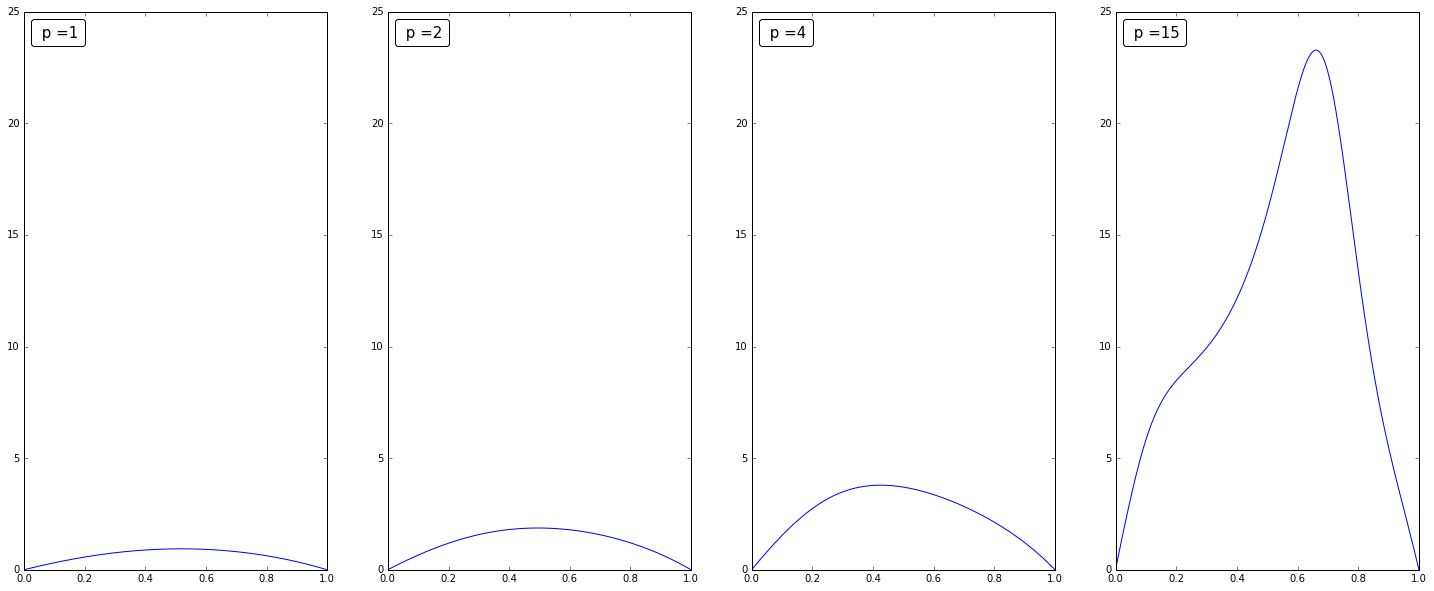

In [186]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.figure(figsize=(25, 10))
for j in range(len(mass_p)):
    ax = plt.subplot(1, len(mass_p), j + 1)
    plt.plot(np.linspace(0,1,len(mass_y[j])), mass_y[j])
    from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
    at = AnchoredText(r' p ={}'.format(mass_p[j]),
                  prop=dict(size=15), frameon=True,
                  loc=2,
                  )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    ax.set_ylim([0,25])
    plt.legend()
plt.show()

## Метод прогонки (Теоретическая часть)

$
$$\begin{equation*}
 \begin{cases}
 v''(x) = p(1-x)\sin(y_0)*v(x)  +r(x) \\
 v(0)=0 \hspace{10mm} v(1) = 0 \hspace{10mm} x\in[0,1] 
 \end{cases}
\end{equation*} 
$$
$

Построим разностную схему второго порядка апроксимации: $\dfrac{v_{n+1} + v_{n-1} - 2v_n}{h^2} = r(x) + p*\sin(y_0)*(1-x)v_n$
$\frac{1}{h^2} v_n + \frac{1}{h^2}v_{n-1} + v_n(-p*sin(y_0)(1-x) - \frac{2}{h^2}) = a_n v_{n-1} + b v_n + c v_{n=1}  = r(x) \hspace{10mm} n \in 2..n-1$

Граничные условия: $v_1=v_n = 0$ 


Для определения сеточной функции решается СЛАУ с трехдиагональной матрицей:

$\begin{pmatrix}
b_{1} & c_{1} & 0 & \cdots & 0 \\
a_{2} & b_{2} & c_{2} & \cdots & 0 \\  
0 & a_{3} & b_{3} & \cdots & 0 \\
\cdots & \cdots & \cdots & \cdots \\
0 & 0 & 0 & \cdots & b_{n}
\end{pmatrix} v = r$

Теорема: Пусть выполнены условия диагонального пробладания $|b_n| \ge |a_n| + |c_n|$  и хотя бы для одной строки матрицы имеет место строгое диагональное преобладание. Пусть кроме того $0 \le \frac{c_1}{b_1} \le 1$. Тогда алгоритм устройчив.

Для данной задачи имеем: $\frac{c_1}{b_1} = \frac{0}{1} = 0, \hspace{10mm} |b_n| = p*sin(y_0)(1-x) + \frac{2}{h^2} \ge \frac{2}{h^2} = \frac{1}{h^2} +  \frac{1}{h^2} = |a_n| + |b_n|$, также , лекго видель что существуую элементы со срогим деогональным преобладанием, а это означает , что метод устойчив.

## Практическая часть

In [138]:

import matplotlib.pyplot as plt
%matplotlib inline

def thomas_algorithm(a, b, c, d):
    """
    Solves the Tridiagonal Linear System
          --             -- -- --   -- --
          |b_1 c_1        | |f_1|   |d_1|
          |a_2 b_2 c_2    | | . |   | . |
          |    a_3 . . .  | | . | = | . |
          |               | |   |   |   |
          |               | |   |   |   |
          |       a_n b_n | |f_n|   |d_n|
          --             -- -- --   -- --
    """
    assert len(a) == len(b) == len(c) == len(d)
    N = len(c)
    c_ = [None for i in range(N)]
    d_ = [None for i in range(N)]
    f = [None for i in range(N)]
    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]

    for i in range(1, N):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])

    f[N-1] = d_[N-1]
    for i in range(N-2, -1, -1):
        f[i] = d_[i] - c_[i]*f[i+1]

    return f

In [170]:

def trid(p):
    k = 10
    y0 = fy0(n)
    for i in range(k):
        #print i
        # We write a_i * Dy_(i-1) + b_i * Dy_i + c_i * Dy_(i+1) = d_i
        A = np.array([1 for i in range(1, n-1)],
                dtype=np.float64)
        B = np.array([p*np.sin(y0[i])*(1-x[i])*2*dx-2
                      for i in range(1, n-1)], dtype=np.float64)
        C = np.array([1-p*np.sin(y0[i])*(1-x[i])*2*dx for i in range(1, n-1)], dtype=np.float16)

        D = np.array([(-p*np.cos(y0[i])*(1-x[i]) - dd_y0(n,y0)[i])*dx*dx
                      for i in range(1, n-1)], dtype=np.float64)


        DY = np.array([0] + thomas_algorithm(A, B, C, D) + [0], dtype=np.float64)
        y0 = y0 + DY
        return y0
        # print (DY*DY).mean()

In [178]:
mass_y=[]
mass_p=[1,4,7,25,50,100]
dx = 0.01
n = 100
x = np.linspace(0, 1, n)
for p in mass_p:
    y0 = fy0(n)
    y = trid(p)
    mass_y.append(y)

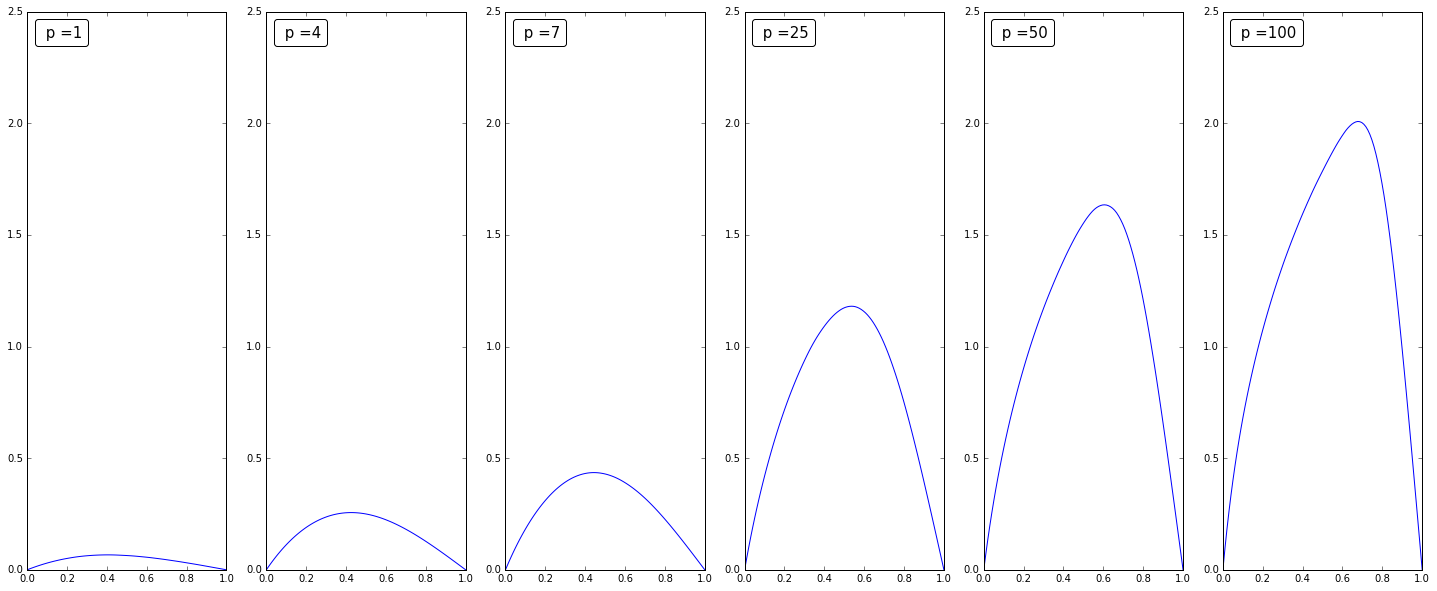

In [180]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.figure(figsize=(25, 10))

for j in range(len(mass_p)):
    ax = plt.subplot(1, len(mass_p), j + 1)
    plt.plot(np.linspace(0,1,len(mass_y[j])), mass_y[j])
    from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
    at = AnchoredText(r' p ={}'.format(mass_p[j]),
                  prop=dict(size=15), frameon=True,
                  loc=2,
                  )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    ax.set_ylim([0,2.5])
    plt.legend()
plt.show()